## Packages

In [12]:
import os.path as osp
from pathlib import Path
from time import time
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import librosa

from IPython.display import Audio
import librosa.display

## Arguments & User Defined Functions

In [2]:
min_words = 40
wavs_dir = "../wavs2/"
target_sr = 16000
transcripts_path = "../outputs/all_transcripts_v2.csv"
transcripts = pd.read_csv(transcripts_path)
print(transcripts.shape)

(111714, 9)


In [3]:
def play_audio(signal, rate):
    return Audio(data=signal, rate=rate)

## Collect All Transcripts

In [4]:
wavs = [path for path in Path(wavs_dir).rglob("*.wav")]
print("WAV Files:", len(wavs))

WAV Files: 488


In [5]:
data = (
    transcripts.loc[
        (transcripts["word_count"] >= min_words)
        & (transcripts["speaker_role"] == "scotus_justice")
    ]
    .copy()
    .reset_index(drop=True)
)

print(data.shape)
data["start_idx"] = np.floor(data["start"] * target_sr).astype(int)
data["end_idx"] = np.ceil(data["end"] * target_sr).astype(int)

# data.to_csv("../outputs/data_transcripts_v2.csv", index=False)

(17138, 9)


In [23]:
# st = time()
# all_data = []
# for i, w in enumerate(wavs):
#     wav_file, wav_sr = librosa.load(w, sr=librosa.core.get_samplerate(w))
#     df = pd.read_json(osp.join(w.parent, w.name.replace(".wav", ".json")))
#     df["file"] = w.name
#     df["line"] = df.index

#     # TODO: Add Sample Rate, Channels
#     df["sample_rate"] = wav_sr
#     df["channels"] = len(wav_file.shape)
#     df["duration"] = df["end"] - df["start"]
#     df["start_idx"] = np.floor(df["start"] * wav_sr).astype(int)
#     df["end_idx"] = np.ceil(df["end"] * wav_sr).astype(int)
#     df["word_count"] = df["text"].apply(lambda x: len(x.split(" ")))

#     data = (
#         df.loc[(df["word_count"] >= 40) & (df["speaker_role"] == "scotus_justice")]
#         .copy()
#         .reset_index(drop=True)
#     )
#     data = data[
#         [
#             "file",
#             "line",
#             "speaker",
#             "start",
#             "end",
#             "duration",
#             "sample_rate",
#             "channels",
#             "start_idx",
#             "end_idx",
#             "word_count",
#             "text",
#         ]
#     ]

#     all_data.append(data)

# all_transcripts = pd.concat(all_data)
# print("\n Record Info:")
# print(all_transcripts.shape)

# print(f"{round(time() - st, 2)}s")


 Record Info:
(2545, 12)
18.79s


In [8]:
data.loc[(data["file"] == "19-715") & (data["line"] == 180)]

file  line   start     end      speaker    speaker_role  word_count  \
15890  19-715   180  3993.0  4011.0  Elena_Kagan  scotus_justice          53   

       duration                                               text  start_idx  \
15890      18.0  Good morning, Mr. Letter. In -- in -- in talki...   63888000   

        end_idx  
15890  64176000

In [15]:
a_sample = data.sample(n=5)
a_sample

file  line     start       end              speaker    speaker_role  \
2242   13-1067    79   993.370  1030.850  Ruth_Bader_Ginsburg  scotus_justice   
10223  17-1174    57  1203.640  1246.160          Elena_Kagan  scotus_justice   
9222    16-460   138  2105.000  2124.240     Stephen_G_Breyer  scotus_justice   
428    12-1182   112  2844.555  2872.023    Anthony_M_Kennedy  scotus_justice   
2658   13-1402    88  1429.955  1447.590    Anthony_M_Kennedy  scotus_justice   

       word_count  duration  \
2242           85    37.480   
10223         117    42.520   
9222           63    19.240   
428            70    27.468   
2658           46    17.635   

                                                    text  start_idx   end_idx  
2242   You did answer, I think -- you did answer, ren...   15893920  16493600  
10223  But, as I read Hartman, Hartman was very depen...   19258240  19938560  
9222   But is it -- well, look, aren't there many sta...   33680000  33987840  
428    But at least if you've adopted a SIP or propos...   45512880  45952368  
2658   Do you -- do you think that in the instance, s...   22879280  23161440

## Listen to Audio

In [9]:
sample_1 = dict(data.iloc[15890])
wav_file, wav_sr = librosa.load(
    path=osp.join(wavs_dir, f"{sample_1['file']}.wav"),
    sr=librosa.core.get_samplerate(osp.join(wavs_dir, f"{sample_1['file']}.wav")),
)

print("Speaker:", sample_1["speaker"])
print("File - Line", sample_1["file"], "-", sample_1["line"])
print("Duration:", sample_1["duration"])
print("Text:", sample_1["text"])
play_audio(wav_file[sample_1["start_idx"] : sample_1["end_idx"]], wav_sr)

Speaker: Elena_Kagan
File - Line 19-715 - 180
Duration: 18.0
Text: Good morning, Mr. Letter. In -- in -- in talking to the Chief Justice about the limits on congressional power, you said -- and tell me if I'm quoting you correctly -- you said that a subpoena couldn't impair the President in carrying out his constitutional functions. Is that -- is that right?


In [10]:
f0, voiced_flag, voiced_probs = librosa.pyin(wav_file[sample_1["start_idx"] : sample_1["end_idx"]], fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C5'))
times = librosa.times_like(f0)

D = librosa.amplitude_to_db(np.abs(librosa.stft(wav_file[sample_1["start_idx"] : sample_1["end_idx"]])), ref=np.max)

fig, ax = plt.subplots()

img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)

ax.set(title='pYIN Fundamental Frequency (Pitch) Estimation')

fig.colorbar(img, ax=ax, format="%+2.f dB")

ax.plot(times, f0, label='f0', color='cyan', linewidth=3)

ax.legend(loc='upper right')

In [ ]:
# Speaker: Elena_Kagan
# File - Line 19-715 - 180

In [71]:
sample_1 = dict(a_sample.iloc[1])
wav_file, wav_sr = librosa.load(
    path=osp.join(wavs_dir, f"{sample_1['file']}.wav"),
    sr=librosa.core.get_samplerate(osp.join(wavs_dir, f"{sample_1['file']}.wav")),
)

print("Speaker:", sample_1["speaker"])
print("File - Line", sample_1["file"], "-", sample_1["line"])
print("Duration:", sample_1["duration"])
print("Text:", sample_1["text"])
play_audio(wav_file[sample_1["start_idx"] : sample_1["end_idx"]], wav_sr)

Speaker: Elena_Kagan
File - Line 17-1174 - 57
Duration: 42.52
Text: But, as I read Hartman, Hartman was very dependent on two factors, neither of which is here. The first is that the prosecutor is absolutely immune, so that you were dealing with upstream actors, and the causation was very difficult. And the second was that there was a presumption of regularity that attached to prosecutorial action. And the combination of both those things meant that the Court said, you know what, in the usual case or in the -- you know, in the more than usual case, in the almost always case, the prosecutor's action has cleansed whatever retaliatory -- retaliatory motive you can find further upstream. And, here, neither one of those two things is true.


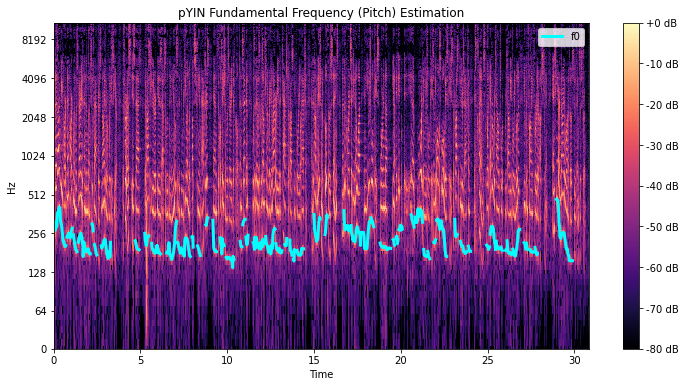

In [72]:
f0, voiced_flag, voiced_probs = librosa.pyin(wav_file[sample_1["start_idx"] : sample_1["end_idx"]], fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C5'))
times = librosa.times_like(f0)

D = librosa.amplitude_to_db(np.abs(librosa.stft(wav_file[sample_1["start_idx"] : sample_1["end_idx"]])), ref=np.max)

fig, ax = plt.subplots(figsize=(12,6))

img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)

ax.set(title='pYIN Fundamental Frequency (Pitch) Estimation')

fig.colorbar(img, ax=ax, format="%+2.f dB")

ax.plot(times, f0, label='f0', color='cyan', linewidth=3)

ax.legend(loc='upper right')

C:\Users\yagne\anaconda3\envs\grandstanding\lib\site-packages\librosa\filters.py:238: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn(


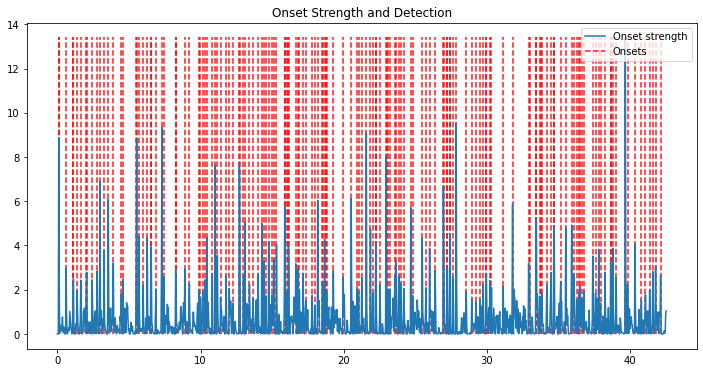

In [73]:
o_env = librosa.onset.onset_strength(wav_file[sample_1["start_idx"] : sample_1["end_idx"]], sr=target_sr, max_size=10)

times = librosa.frames_to_time(np.arange(len(o_env)), sr=target_sr)

onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=target_sr)

D = np.abs(librosa.stft(wav_file[sample_1["start_idx"] : sample_1["end_idx"]]))

fig, ax = plt.subplots(figsize=(12,6))

plt.title('Onset Strength and Detection')

plt.plot(times, o_env, label='Onset strength')

plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')

plt.axis('tight')

plt.legend(loc='upper right')

plt.show()

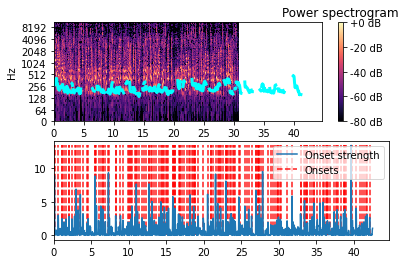

In [74]:
y = wav_file[sample_1["start_idx"] : sample_1["end_idx"]]
D = np.abs(librosa.stft(y))

plt.figure()

ax1 = plt.subplot(2, 1, 1)

librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),

                         x_axis='time', y_axis='log')
ax1.plot(times, f0, label='f0', color='cyan', linewidth=3)
fig.colorbar(img, ax=ax1, format="%+2.f dB")

plt.title('Power spectrogram')

plt.subplot(2, 1, 2, sharex=ax1)

plt.plot(times, o_env, label='Onset strength')

plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,

           linestyle='--', label='Onsets')

plt.axis('tight')

plt.legend(frameon=True, framealpha=0.75)

plt.show()

In [45]:
sample_1 = dict(a_sample.iloc[2])
wav_file, wav_sr = librosa.load(
    path=osp.join(wavs_dir, f"{sample_1['file']}.wav"),
    sr=librosa.core.get_samplerate(osp.join(wavs_dir, f"{sample_1['file']}.wav")),
)

print("Speaker:", sample_1["speaker"])
print("File - Line", sample_1["file"], "-", sample_1["line"])
print("Duration:", sample_1["duration"])
print("Text:", sample_1["text"])
play_audio(wav_file[sample_1["start_idx"] : sample_1["end_idx"]], wav_sr)

Speaker: Stephen_G_Breyer
File - Line 16-460 - 138
Duration: 19.24
Text: But is it -- well, look, aren't there many statutes, or I don't know how many, but isn't it somewhat normal, the federal government does say the thing is tolled, the state law is tolled while it's pending? Are there no other statutes like that where it just says the state law is pending -- is tolled while your federal suit is pending?


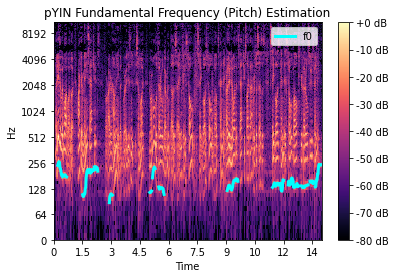

In [46]:
f0, voiced_flag, voiced_probs = librosa.pyin(wav_file[sample_1["start_idx"] : sample_1["end_idx"]], fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C5'))
times = librosa.times_like(f0)

D = librosa.amplitude_to_db(np.abs(librosa.stft(wav_file[sample_1["start_idx"] : sample_1["end_idx"]])), ref=np.max)

fig, ax = plt.subplots()

img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)

ax.set(title='pYIN Fundamental Frequency (Pitch) Estimation')

fig.colorbar(img, ax=ax, format="%+2.f dB")

ax.plot(times, f0, label='f0', color='cyan', linewidth=3)

ax.legend(loc='upper right')

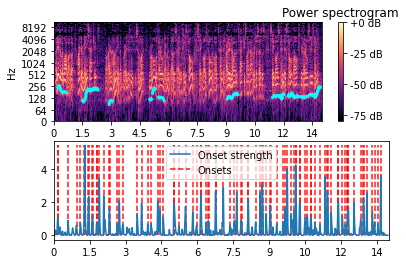

In [51]:
y = wav_file[sample_1["start_idx"] : sample_1["end_idx"]]
D = np.abs(librosa.stft(y))

plt.figure()

ax1 = plt.subplot(2, 1, 1)

librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),

                         x_axis='time', y_axis='log')
ax1.plot(times, f0, label='f0', color='cyan', linewidth=3)
fig.colorbar(img, ax=ax1, format="%+2.f dB")

plt.title('Power spectrogram')

plt.subplot(2, 1, 2, sharex=ax1)

plt.plot(times, o_env, label='Onset strength')

plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,

           linestyle='--', label='Onsets')

plt.axis('tight')

plt.legend(frameon=True, framealpha=0.75)

plt.show()

C:\Users\yagne\anaconda3\envs\grandstanding\lib\site-packages\librosa\filters.py:238: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn(


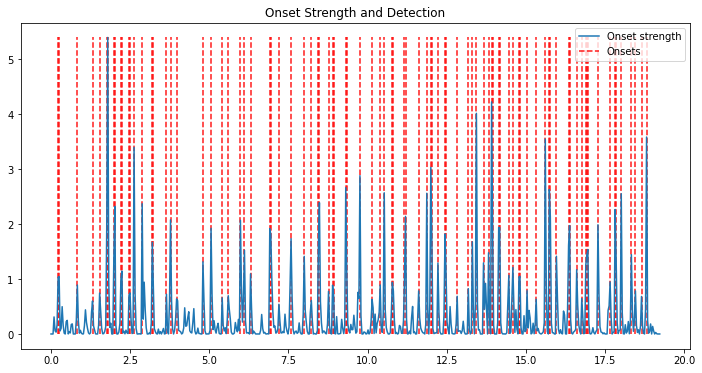

In [43]:
o_env = librosa.onset.onset_strength(wav_file[sample_1["start_idx"] : sample_1["end_idx"]], sr=target_sr, max_size=20)

times = librosa.frames_to_time(np.arange(len(o_env)), sr=target_sr)

onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=target_sr)

D = np.abs(librosa.stft(wav_file[sample_1["start_idx"] : sample_1["end_idx"]]))

fig, ax = plt.subplots(figsize=(12,6))

plt.title('Onset Strength and Detection')

plt.plot(times, o_env, label='Onset strength')

plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')

plt.axis('tight')

plt.legend(loc='upper right')

plt.show()

In [20]:
sample_1 = dict(a_sample.iloc[3])
wav_file, wav_sr = librosa.load(
    path=osp.join(wavs_dir, f"{sample_1['file']}.wav"),
    sr=librosa.core.get_samplerate(osp.join(wavs_dir, f"{sample_1['file']}.wav")),
)

print("Speaker:", sample_1["speaker"])
print("File - Line", sample_1["file"], "-", sample_1["line"])
print("Duration:", sample_1["duration"])
print("Text:", sample_1["text"])
play_audio(wav_file[sample_1["start_idx"] : sample_1["end_idx"]], wav_sr)

Speaker: Anthony_M_Kennedy
File - Line 12-1182 - 112
Duration: 27.468
Text: But at least if you've adopted a SIP or proposed a SIP, you've given reasons, you have a -- you have a rational plan, and the EPA then must give a reasoned response to it. Whereas, if the EPA is the first one, they're writing on a blank slate; and it seems to me that in some respects, the EPA is more constrained under this process to which you object.


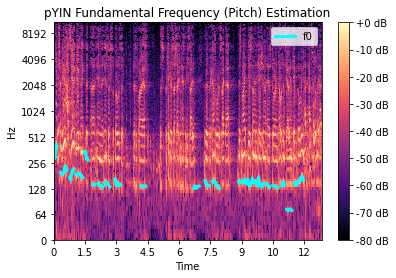

In [65]:
f0, voiced_flag, voiced_probs = librosa.pyin(wav_file[sample_1["start_idx"] : sample_1["end_idx"]], fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C5'))
times = librosa.times_like(f0)

D = librosa.amplitude_to_db(np.abs(librosa.stft(wav_file[sample_1["start_idx"] : sample_1["end_idx"]])), ref=np.max)

fig, ax = plt.subplots()

img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)

ax.set(title='pYIN Fundamental Frequency (Pitch) Estimation')

fig.colorbar(img, ax=ax, format="%+2.f dB")

ax.plot(times, f0, label='f0', color='cyan', linewidth=3)

ax.legend(loc='upper right')

C:\Users\yagne\anaconda3\envs\grandstanding\lib\site-packages\librosa\filters.py:238: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn(


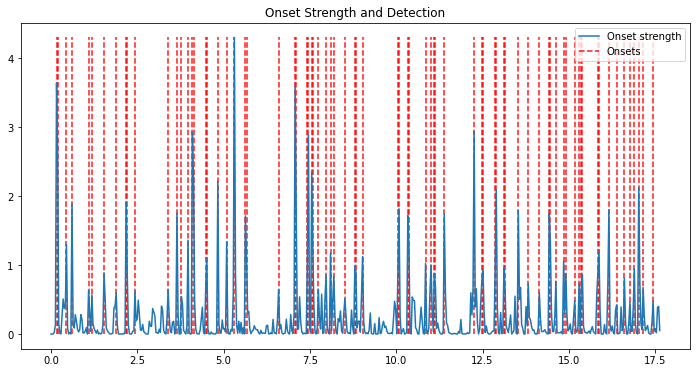

In [66]:
o_env = librosa.onset.onset_strength(wav_file[sample_1["start_idx"] : sample_1["end_idx"]], sr=target_sr, max_size=20)

times = librosa.frames_to_time(np.arange(len(o_env)), sr=target_sr)

onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=target_sr)

D = np.abs(librosa.stft(wav_file[sample_1["start_idx"] : sample_1["end_idx"]]))

fig, ax = plt.subplots(figsize=(12,6))

plt.title('Onset Strength and Detection')

plt.plot(times, o_env, label='Onset strength')

plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')

plt.axis('tight')

plt.legend(loc='upper right')

plt.show()

In [67]:
sample_1 = dict(a_sample.iloc[4])
wav_file, wav_sr = librosa.load(
    path=osp.join(wavs_dir, f"{sample_1['file']}.wav"),
    sr=librosa.core.get_samplerate(osp.join(wavs_dir, f"{sample_1['file']}.wav")),
)

print("Speaker:", sample_1["speaker"])
print("File - Line", sample_1["file"], "-", sample_1["line"])
print("Duration:", sample_1["duration"])
print("Text:", sample_1["text"])
play_audio(wav_file[sample_1["start_idx"] : sample_1["end_idx"]], wav_sr)

Speaker: Anthony_M_Kennedy
File - Line 13-1402 - 88
Duration: 17.635
Text: Do you -- do you think that in the instance, suppose that Justice Breyer asked this particular subsection has to be cited, that if the consular were to cite that, this might give some indication as to our intelligence-gathering capability and the information that we have?


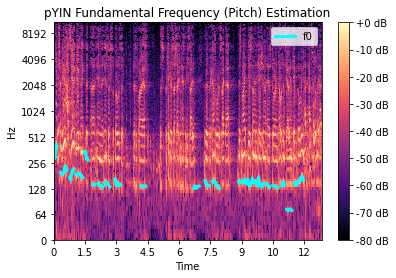

In [68]:
f0, voiced_flag, voiced_probs = librosa.pyin(wav_file[sample_1["start_idx"] : sample_1["end_idx"]], fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C5'))
times = librosa.times_like(f0)

D = librosa.amplitude_to_db(np.abs(librosa.stft(wav_file[sample_1["start_idx"] : sample_1["end_idx"]])), ref=np.max)

fig, ax = plt.subplots()

img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)

ax.set(title='pYIN Fundamental Frequency (Pitch) Estimation')

fig.colorbar(img, ax=ax, format="%+2.f dB")

ax.plot(times, f0, label='f0', color='cyan', linewidth=3)

ax.legend(loc='upper right')

C:\Users\yagne\anaconda3\envs\grandstanding\lib\site-packages\librosa\filters.py:238: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn(


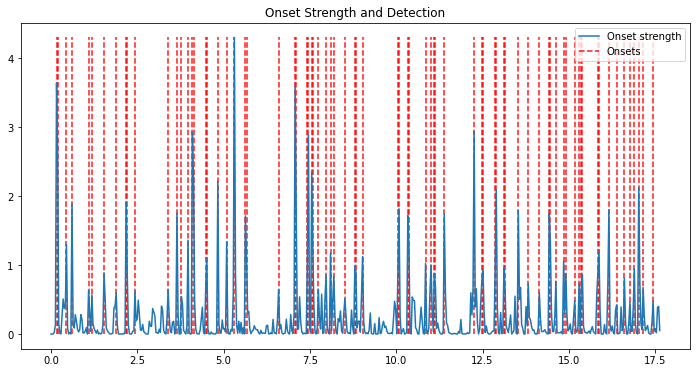

In [64]:
o_env = librosa.onset.onset_strength(wav_file[sample_1["start_idx"] : sample_1["end_idx"]], sr=target_sr, max_size=20)

times = librosa.frames_to_time(np.arange(len(o_env)), sr=target_sr)

onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=target_sr)

D = np.abs(librosa.stft(wav_file[sample_1["start_idx"] : sample_1["end_idx"]]))

fig, ax = plt.subplots(figsize=(12,6))

plt.title('Onset Strength and Detection')

plt.plot(times, o_env, label='Onset strength')

plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')

plt.axis('tight')

plt.legend(loc='upper right')

plt.show()